In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('Desktop\DS\KNN algo\Wholesale data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [46]:
df.shape

(440, 8)

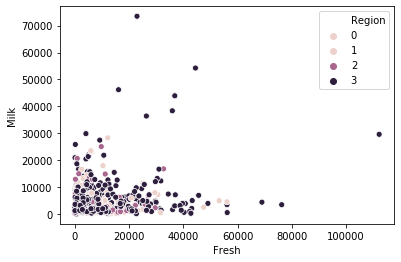

In [62]:
sns.scatterplot(x=df['Fresh'],y=df['Milk'],hue=df['Region'])

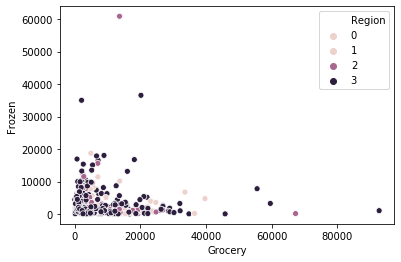

In [63]:
sns.scatterplot(x=df['Grocery'],y=df['Frozen'],hue=df['Region'])

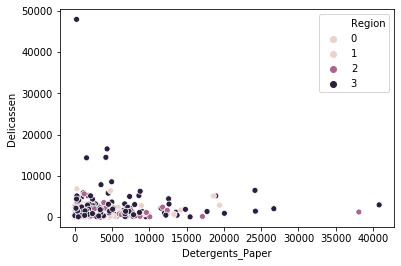

In [64]:
sns.scatterplot(x=df['Detergents_Paper'],y=df['Delicassen'],hue=df['Region'])

In [47]:
from sklearn.model_selection import train_test_split
x=np.asarray(df.iloc[:,2:])
y=np.asarray(df['Region'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=45)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))

0.6306818181818182


In [49]:
from sklearn.model_selection import cross_val_score
cv_score=[]
cv_score1=[]
mylist=list(range(1,100))
mylist=list(filter(lambda x: x%2 !=0,mylist))
one=list()
for k in mylist:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    cv_score.append(score.mean())
    score1=cross_val_score(knn,x_test,y_test,cv=10,scoring='accuracy')
    cv_score1.append(score1.mean())
    one.append('1')

In [50]:
newList=list()
for x in mylist:
    newList.append(1/x)

In [51]:
MSE=[1-x for x in cv_score]
MSE1=[1-x for x in cv_score1]

In [52]:
optimal_k=MSE.index(min(MSE))
print(optimal_k)

8


Text(0, 0.5, 'MSE')

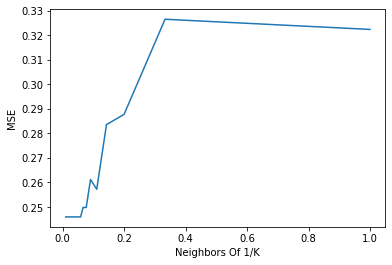

In [53]:
plt.plot(newList,MSE)
plt.xlabel('Neighbors Of 1/K')
plt.ylabel('MSE')

From the above graph we get minimum value of MSE for K=4

Text(0, 0.5, 'MSE1')

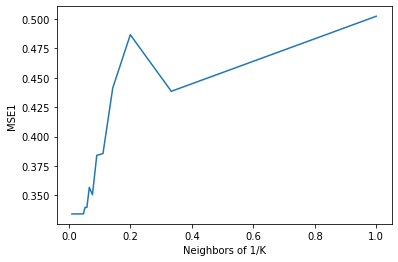

In [54]:
plt.plot(newList,MSE1)
plt.xlabel('Neighbors of 1/K')
plt.ylabel('MSE1')


# KNN Function

In [55]:
def train(x_train,y_train):
    return

In [56]:
from collections import Counter
def pre(x_train,y_train,x_test,k):
    distances=[]
    target=[]
    for i in range(len(x_train)):
        dist=np.sqrt(np.sum(np.square(x_test-x_train[i:])))
        distances.append([dist,i])
    distances=sorted(distances)
    for j in range(k):
        index=distances[i][1]
        target.append(y_train[index])
    return Counter(target).most_common(1)[0][0]

In [57]:
def KNN(x_train,y_train,x_test,pred,k):
    if k>len(x_train):
        raise ValueError
        
    train(x_train,y_train)
    for i in range(len(x_test)):
        pred.append(pre(x_train,y_train,x_test[i,:],k))

In [58]:
pred=[]
try:
    KNN(x_train,y_train,x_test,pred,8)
    pred=np.asarray(pred)
    accuracy=accuracy_score(y_test,pred)
    print('Accuracy Score=',accuracy*100)
except ValueError:
    print("Can't have more neighbor then training sample!!")

Accuracy Score= 66.47727272727273
